# MANY DUMMIES #

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# read in csv
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
pd.options.display.max_columns = 999
df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)

df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [7]:
# If column is Nominal, do this:
# pd.get_dummies()

# If column is Ordinal, do this:
#df['Kitchen Qual Num'] = df['Kitchen Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})

#putting dummies here so that I don't have to rerun them below
df = pd.get_dummies(df, columns = ['Neighborhood'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Neighborhood'], drop_first=True)
#create variable for Neighborhood with dummies
neigh_dum = [col for col in df.columns if 'Neighborhood' in col]

neigh_dum_test = [col for col in df_test.columns if 'Neighborhood' in col]
diff_neigh = list(set(neigh_dum) - set(neigh_dum_test))
df_test[diff_neigh[0]] = 0
df_test[diff_neigh[1]] = 0

In [8]:
#df FEATURES:
#df['year_remod_or_built'] = df['Year Remod/Add'] * df['Year Built']
df['Exter Cond Num'] = df['Exter Cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df['Exter Qual Num'] = df['Exter Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
#df['Kitchen Qual Num'] = df['Kitchen Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
#df['Bsmt Qual Num'] = df['Bsmt Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
#df['Bsmt Cond Num'] = df['Bsmt Cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
#, 'Bsmt Qual Num', 'Bsmt Cond Num'

In [9]:
#df_test FEATURES:
df_test['Exter Cond Num'] = df_test['Exter Cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['Exter Qual Num'] = df_test['Exter Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
#df_test['year_remod_or_built'] = df_test['Year Remod/Add'] * df_test['Year Built']
#df_test['Kitchen Qual Num'] = df_test['Kitchen Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
#df_test['Bsmt Qual Num'] = df_test['Bsmt Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
#df_test['Bsmt Cond Num'] = df_test['Bsmt Cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
#'year_remod_or_built',, 'Kitchen Qual Num'

In [10]:
features = ['Overall Qual', 'Overall Cond', 'Exter Cond Num', 'Exter Qual Num']
#features.extend(neigh_dum)
X = df[features]
y = df['SalePrice']

#instantiate
lr = LinearRegression()

In [11]:
cross_val_score(lr,X,y).mean()

0.6713041971633605

In [12]:
# train test spli
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.15, random_state=33)

# fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
#train score
lr.score(X_train, y_train)

0.6916122213442228

In [14]:
#test score
lr.score(X_val, y_val)

0.5668920251027748

In [15]:
#this was a test, if doing in eaernest, would have stopped above
cross_val_score(lr,X_train,y_train).mean()

0.6873616447340629

In [16]:
#dont do this because it gives us the answer...cross_val_score(lr,X_val,y_val).mean()

In [17]:
# make predictions
pred = lr.predict(X)
pred

array([192061.88069044, 232887.93275482, 133090.93725046, ...,
       163782.6182883 ,  95941.10920449, 200662.78605413])

In [18]:
#residuals 
residuals = y-pred
residuals

0      -61561.880690
1      -12887.932755
2      -24090.937250
3       43151.665179
4      -21336.733990
            ...     
2046    30955.841629
2047   -13441.109204
2048    13217.381712
2049    48058.890796
2050   -11662.786054
Name: SalePrice, Length: 2051, dtype: float64

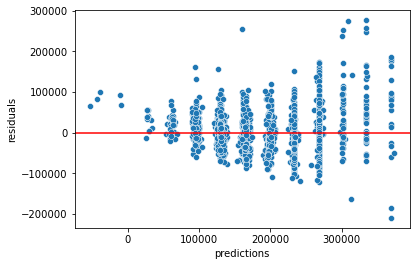

In [19]:
plt.axhline(y=0, color='r')
sns.scatterplot(x=pred, y=residuals)
('Residual Plot to Show error - Epsilon')
plt.xlabel('predictions')
plt.ylabel('residuals');

-710.3251667338802

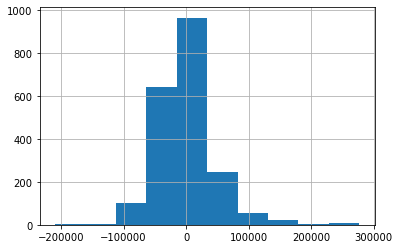

In [20]:
residuals.hist();
residuals.mean()

In [21]:
residuals.sort_values()

960    -209834.756305
1885   -185984.756305
125    -162836.755014
348    -120795.158371
951    -119758.498399
            ...      
151     253878.616012
1897    255163.266010
1964    256659.469311
1692    275609.129284
1671    276729.469311
Name: SalePrice, Length: 2051, dtype: float64

In [22]:
#df_test.shape

#df_test[features]

#make preds on test
test_preds = lr.predict(df_test[features])
#test_preds.shape

#create target column 'SalePrice' in df_test
df_test['SalePrice'] = test_preds

#create df for submission with only Id and SalePrice
submission = df_test[['Id', 'SalePrice']]

submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
2658,153648.247262
2718,132821.276970
2414,232887.932755
1989,161100.539372
625,165755.560438


In [23]:
#submission.to_csv('../datasets/Kaggle Submissions/15 split Qual and Cond.csv')